# Features beyond words

To this point, we’ve looked at how to get capture the structure of text as tabular data in R. Words have been the atomic units of interest, or **features**, and the process of creating a table in which each feature is quantified for each text sample is often called **feature extraction**.

In this section we’ll look at some alternative feature sets beyond words—although most of these are derived from words in some way. Sometimes we collapse words together, for example by **stemming** or **part of speech** tagging, resulting in a smaller feature set. Sometimes, by contrast, we look at word combinations, **n-grams**, and the feature set becomes even bigger. In either case, we will likely go through a process of **feature selection** later, where we mix and match the features most useful to our specific task.

## Responsions between author and audience

One of my favourite aspects of Homer’s poems is the evidence that their oral-formulaic origins has left in the text of an intimate feedback loop between the singer and the audience: the scenes that have been elaborated and adorned with formulas to luxuriate in the listeners’ attention; the concise way information can be condensed when the plot needs to more forward.

But the feedback process is not limited to oral composition. Vergil showed the enomous originality that was possible in "fan fiction" when he turned the raw material of Homer to his own epic purposes. As he was still composing the *Aeneid*, he was already receiving "comments" from his audience, for example Propertius 2.34.66, *nescio quid maius nascitur Iliade*, "Something greater than the Iliad is coming to birth." In particular, he seems to quote Vergil’s own preface to the second half of the Aeneid, which he calls a *maius opus*, "a greater work" (Aen. 7.45).

## Fans and fan fiction

In 2014, author Anna Todd composed the novel *After* largely on her phone, using the online self-publishing platform Wattpad. The novel was conceived as a fan fiction, not of a book or film, but of the real-life boy-band One Direction. The story became wildly popular, with readership topping 1,000,000,000 views even as she was writing. According to a contemporary interview with the *New York Times*, she would generate new content daily in response to reader’s comments, shaping the storyline in response to their own fantasies as well as her own. Despite the fact that the novel is [still available for free on Wattpad](https://www.wattpad.com/story/5095707-after), Todd went on to sign a "six-figure" book deal, including film rights. 

Not all authors experience this feedback loop so positively, however. George R. R. Martin, author of *A Game of Thrones* and its sequels, reported in an interview that he had been forced to stop reading the theories of his fans online. As he continued to develop the labyrinthine subplots and Tolstoy-sized cast of characters, he had found himself deliberately trying to outsmart the readers. When they correctly guessed the path of the plot, he would change it to foil them. But, he grimly noted, "That way lies madness and disaster." As he fell victim to depression and writer’s block, some fans turned against him. In forums like [Finish the Book, George](https://grrrm.livejournal.com/), some goaded and provoked him. Eventually, the course of the novels was overcome by the television series.

## Case study: Annacharlier’s *Don’t Go*

<div style="float:right; width:250px; margin:1.5em">
    <figure>
        <img src="https://upload.wikimedia.org/wikipedia/en/1/1c/She-Ra_comparison.png" alt="image">
        <caption>She-Ra in 1985 and 2018. <br/>Source: wikipedia.org</caption>
    </figure>
</div>

For the rest of this session, I want to look at an interesting convolution of fan-author feedback, drawn from the fan fiction web site [Archive of Our Own](https://archiveofourown.org/) (AO3). Annacharlier’s 5000-word *Don’t Go* is the most-read submission within the fandom dedicated to "She-Ra and the Princesses of Power," a Netflix children’s cartoon. "She-Ra" is itself intertextual, being a 2018 reboot of an earlier children’s show from the 1980s, in part deliberately designed to subvert the original program’s messaging about gender norms, sexuality, and body image.

Like many fan fictions, *Don’t Go* represents beloved characters, in this case the protagonist Adora and her principal antagonist Catra, in the "downtime" between episodes, allowing the audience to indulge in a [sense of immersion](https://en.wikipedia.org/wiki/Parasocial_interaction) in the character’s everyday lives. Also like many fan fictions (dating back at least to the revolutionary Kirk/Spock amateur fictions of the mid-twentieth century), this one develops a same-sex romantic relationship (or **ship**) between principal characters. (Unlike the Kirk/Spock relationship, the "Catradora" ship was established as canonical in the series finale, released a mere 5 days before this story was posted.)
 
What makes the story interesting to me, however, is that not long after it appeared on the site, its pseudonymous author was revealed to be ND Stevenson, the show’s creater herself, granting quasi-canonical status to the events described along with enormous encouragement to other fan-fiction authors. In the examples below, we’ll practice downloading the story from AO3 and performing several different feature extraction techniques.

In [1]:
# only need to do this once
install.packages(c('rvest', 'polite'))


The downloaded binary packages are in
	/var/folders/_k/nhmmjzg96r318bm9jvyvv7ph0000gn/T//RtmpcltZQa/downloaded_packages


These packages are useful tools for tidy-compatible web-scraping. Specifically, the package **rvest** (apparently a pun on "harvest") can be used for downloading pages from the web and parsing their content using **xpath** or **css selectors**, while **polite** is a wrapper for parts of rvest that ensures your script complies with the crawling/scraping policies set out in a site’s `robots.txt` file.

Abiding by the site’s limitations for automated downloads will make sure your script isn’t ruining the experience of human users. It also makes it less likely that you’ll be booted from the site in the middle of a long-running process.

In [2]:
library(tidyverse)
library(tidytext)
library(rvest)
library(polite)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




### Create a session

This opens our session with the website, announcing our intention and checking for rules pertaining to automated scripts.

In [3]:
base_url <- 'https://www.archiveofourown.org'
session <- bow(base_url, force=TRUE)           # setting force=TRUE will clear any cached session info

Let’s inspect the session object:

In [4]:
session

<polite session> https://www.archiveofourown.org
    User-agent: polite R package - https://github.com/dmi3kno/polite
    robots.txt: 23 rules are defined for 3 bots
   Crawl delay: 5 sec
  The path is scrapable for this user-agent

This says that we’re allowed to read the site using non-human agents, but they want us to introduce a five-second delay between requests.

The `User-agent` line shows how we’ve identified ourselves to the site. If you want, you can specify something else by passing e.g. `user_agent='cforstall experiment number 1'` as an additional argument to `bow()`. For comparison, here is the equivalent field that my normal web browser reports to sites I’m visiting as a human:

    User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:101.0) Gecko/20100101 Firefox/101.0
    
    
### Managing the session

Now that we have a session, we can make as many requests as we like to the same URL (for example with different parameters) and polite will make sure that we comply with the rules. But if we want to change the URL path, we need to check in with the site again using `nod()`:

In [5]:
session <- session %>% nod('/works/24280306')

We can download a page using `scrape()`:

In [6]:
html_doc <- session %>% scrape()

The result is a complex object representing the structure of the HTML document. The easiest way to work with it is using rvest’s `html_*` functions: especially `html_elements()`, `html_attrs()`, `html_table()`, and `html_text2()`.

These allow you to search for specific parts of the page using xpath or css expressions. For example, all the `<div>` nodes:

In [7]:
html_doc %>% html_elements('div')

{xml_nodeset (24)}
 [1] <div id="outer" class="wrapper">\n      <ul id="skiplinks"><li><a href=" ...
 [2] <div id="header" class="region">\n\n  <h1 class="heading">\n    <a href= ...
 [3] <div id="login" class="dropdown">\n      <p class="user actions" role="m ...
 [4] <div id="small_login" class="simple login">\n\t<form class="new_user" id ...
 [5] <div class="clear"></div>
 [6] <div id="inner" class="wrapper">\n        <!-- BEGIN sidebar -->\n       ...
 [7] <div id="main" class="works-show region" role="main">\n          \n      ...
 [8] <div class="flash"></div>
 [9] <div class="wrapper">\n\n  <dl class="work meta group" role="complementa ...
[10] <div id="workskin">\n  <div class="preface group">\n    <h2 class="title ...
[11] <div class="preface group">\n    <h2 class="title heading">\n      Don't ...
[12] <div class="summary module" role="complementary">\n          <h3 class=" ...
[13] <div id="chapters" role="article">\n        <h3 class="landmark heading" ...
[14] <div class="

Here, we use **css** selectors to look for the first `<div>` of class `summary`, then take the first `<blockquote>` from within that, to islote the "Summary" section at the top of Annacharlier’s story. Then we extract just the text:

In [8]:
html_doc %>% 
    html_element('div.summary.module') %>%
    html_element('blockquote') %>% 
    html_text2()

[1] "They stay that way for a long time, Catra’s face tucked into Adora’s shoulder, Adora gently cradling Catra’s head. Adora is careful not to hug Catra too hard or make her feel restrained, anticipating the moment that Catra will start to pull away — but Catra doesn’t. She hangs on so tightly it hurts, her claws digging through Adora’s jacket and into her back, latching into her like she did when she was a kitten and didn’t know how much her claws could hurt. Adora tries not to wince, tries not to move a single muscle, worried that if she does the spell will break and Catra will struggle away, appalled at having shown weakness.\n\nBut Catra doesn’t let go. And so neither does Adora."

### Manual inspection

This part of your research demands a lot of time-consuming manual inspection of the web site you’re interested in. You need to understand how the underlying HTML is structured so that you can pick out the information you want. This almost always entails bespoke solutions and lots of trial and error.

I like to use the "Developer Tools" feature of my web browser to examine the structure of the page. You might prefer to use your favourite text editor. There are also third-party plugins or extensions that you can add to your browser.

Here’s what the site looks like in my browser:

<div style="margin:1em; padding:1em">
<img src="img/annacharlier.png">
</div>
    
Here’s the underlying source HTML for the "Summary" section, also viewed in my browser:

<div style="margin:1em; padding:1em">
<img src="img/annacharlier_source.png">
</div>
    
And here’s what it looks like using the browser’s "inspector" tool. I use Firefox, but the other major browsers have similar functionality. (Sometimes you have to check a box in "Settings" or "Preferences" to enable these tools.)

<div style="margin:1em; padding:1em">
<img src="img/annacharlier_inspector.png">
</div>

Let’s extract the main body of the text from this page so we can process it. It looks to me like the story is enclosed in `<div id="chapters" role="article">`, and then within `<div class="userstuff">`. Let’s try that as a first attempt.

In [9]:
text <- html_doc %>% 
    html_element('div#chapters div.userstuff') %>% 
    html_text2()

In [10]:
str(text)

 chr "They stay that way for a long time, Catra’s face tucked into Adora’s shoulder, Adora gently cradling Catra’s he"| __truncated__


In [11]:
nchar(text)

[1] 30706

Let’s tokenize into words with `unnest_tokens()`. But `unnest_tokens()` is expecting a tibble, so first we have to create a tibble with a single row:

In [12]:
# create a one-row tibble for Annacharlier's story
fan_fics <- tibble(
    ao3_id = 24280306,
    text = text
)

# tokenize
tokens <- fan_fics %>%
    unnest_tokens(output=word, input=text)

In [13]:
tokens %>% head(10)

ao3_id,word
<dbl>,<chr>
24280306,they
24280306,stay
24280306,that
24280306,way
24280306,for
24280306,a
24280306,long
24280306,time
24280306,catra’s


## n-grams

Let’s examine some other tokenization options with `unnest_tokens()`. In addition to individual words, we can also break the text into **n-grams**, groups of successive words. Because word frequencies are highly dependent on each other, **bigrams** (pairs), **trigrams** (triples), or even larger groups of words are often more informative than single words (i.e. **unigrams**).

To tokenize into ngrams, add the optional argument `token="ngrams"` and specify a value for `n`:

In [14]:
# tokenize
bigrams <- fan_fics %>%
    unnest_tokens(output=bigram, input=text, token="ngrams", n=2)

head(bigrams)

ao3_id,bigram
<dbl>,<chr>
24280306,they stay
24280306,stay that
24280306,that way
24280306,way for
24280306,for a
24280306,a long


The two-word window slides along the text one word at a time, so each word (except the first) appears twice, once as the right-hand member and once as the left-hand member.

Which bigrams are most common?

In [15]:
bigrams %>%
    count(bigram, sort=TRUE) %>%
    head(10)

bigram,n
<chr>,<int>
in the,18
she doesn’t,18
of the,16
as she,15
her eyes,15
in her,15
her head,14
she can,14
and she,13


## Skip-grams

Sometimes two or more words form a significant collocation but don’t appear exactly side-by-side. For this, we can use "skip_ngrams" as the value for `token`. In addition to passing `n`, we can also specify `k`, the maximum number of intervening words. 

For example, this should find all words that co-occur with no more than four words between them. I’m also using `n_min` to eliminate unigrams from the output.

In [16]:
fan_fics %>%
    unnest_tokens(output=skipgram, input=text, token="skip_ngrams", n=2, n_min=2, k=4) %>%
    count(skipgram, sort=TRUE) %>%
    head(10)

skipgram,n
<chr>,<int>
she the,45
to her,44
her her,42
her she,42
the the,41
her and,40
the her,39
and her,38
catra her,37


### Separating n-grams for analysis

It may be helpful, after you’ve tallied the n-grams, to split them back into their component words. For this, we can use the function `separate()`, which splits a single column as if it were a string, based on some separator pattern. By default, `unnest_tokens()` joins the words of an n-gram with a space, so we’ll split on spaces.

In [17]:
bigrams <- bigrams %>%
    count(bigram, sort=TRUE) %>%
    separate(bigram, into=c('left', 'right'), sep=' ', remove=FALSE)

In [18]:
head(bigrams)

bigram,left,right,n
<chr>,<chr>,<chr>,<int>
in the,in,the,18
she doesn’t,she,doesn’t,18
of the,of,the,16
as she,as,she,15
her eyes,her,eyes,15
in her,in,her,15


In [19]:
bigrams %>%
    filter(right=='eyes')

bigram,left,right,n
<chr>,<chr>,<chr>,<int>
her eyes,her,eyes,15
adora’s eyes,adora’s,eyes,2
catra eyes,catra,eyes,1
clone eyes,clone,eyes,1
door eyes,door,eyes,1
entrapta’s eyes,entrapta’s,eyes,1
gold eyes,gold,eyes,1
other’s eyes,other’s,eyes,1
over eyes,over,eyes,1


In [20]:
bigrams %>%
    filter(left=="catra’s") %>% 
    head(20)

bigram,left,right,n
<chr>,<chr>,<chr>,<int>
catra’s hand,catra’s,hand,4
catra’s face,catra’s,face,3
catra’s back,catra’s,back,2
catra’s hands,catra’s,hands,2
catra’s head,catra’s,head,2
catra’s room,catra’s,room,2
catra’s wrists,catra’s,wrists,2
catra’s broken,catra’s,broken,1
catra’s chuckle,catra’s,chuckle,1


### Character-based features

You can also split your text into character-based n-grams, (sometimes called "shingles" because they overlap like roof tiles). Character n-grams were proposed early in the 21st century as a "language agnositic" featureset, so that, for example, you could treat Modern Greek and Mandarin with the same algorithm as Latin-based languages.

Meanwhile, character n-grams have also been useful in the study of poetry, where sound may have as significant a role to play as meaning in structuring the text. 

Character n-grams can have the effect of capturing abstract morphological as well as semantic units. In English, the 4-gram "walk" matches "walk", "walks", and "walked", while the ngrams "ing", and "ly", match abstract part-of-speech categories like *participle*, *adverb*. Note, again, that these different kinds of information are combined in the same channel—sound frequency—while a formal parser would separate them into different columns.

Here we use `unnest_tokens()` to tokenize Annacharlier’s story into character 3-grams.

In [21]:
shingles <- fan_fics %>%
    unnest_tokens(output=ngram, input=text, token="character_shingles", n=3)

In [22]:
head(shingles)

ao3_id,ngram
<dbl>,<chr>
24280306,the
24280306,hey
24280306,eys
24280306,yst
24280306,sta
24280306,tay


In [23]:
shingles %>%
    count(ngram, sort=TRUE) %>%
    head(10)

ngram,n
<chr>,<int>
the,356
her,311
she,299
ing,229
tra,194
and,175
atr,171
cat,170
ora,152


## Parsing and annotating with language-specific models

To extract more precise information about text, it helps to have a pre-trained, language-specific **model**. There are several **natural language processing** [packages available for R](https://cran.r-project.org/web/views/NaturalLanguageProcessing.html); to be honest, I’m not an expert in any of them. We can cover the basics here, but if you want to do NLP, you’ll need to work through a more specialized tutorial and figure out which tools best suit your research.

Something that’s going to be true no matter which tools you use: their accuracy will depend upon the model, which in turn depends upon the training material. Results for English tend to be better than for other languages, because the models have been trained on more data. Likewise, results for newspaper articles, financial reports, and office emails will be better than for Early Modern novels, because the language of the training material is often newspapers and business documents.

In addition to the annotation software, you will also have to download a model for the language you’re working with (or train your own—a task well beyond the scope of this workshop, but potentially rewarding if you happen to have an interesting corpus that’s already been annotated by hand). Often this is a bulky binary file that the NLP package will want to store somewhere on your computer—make sure you remember where it is, because you’ll need to load it each time you use the program. You might have a collection of models for different langauges.

### Simple annotating with udpipe

For this workshop, we’re going to do some simple parsing with **udpipe**, a package that I find relatively easy to get started with. It doesn’t produce tibbles by default, but it fits into tidyverse workflows with relatively little friction.

First, we have to install the package:

In [24]:
# only need to do this once
install.packages('udpipe')


The downloaded binary packages are in
	/var/folders/_k/nhmmjzg96r318bm9jvyvv7ph0000gn/T//RtmpcltZQa/downloaded_packages


In [25]:
library(udpipe)

We also need to download the language model(s) we’re interested in. For this exercise, I’m using 'english'. If someone wants to test out the 'german-hdt' model later, let me know how it seems to perform for you.

In [26]:
udpipe_download_model('english')


 - This model has been trained on version 2.5 of data from https://universaldependencies.org

 - The model is distributed under the CC-BY-SA-NC license: https://creativecommons.org/licenses/by-nc-sa/4.0

 - Visit https://github.com/jwijffels/udpipe.models.ud.2.5 for model license details.

 - For a list of all models and their licenses (most models you can download with this package have either a CC-BY-SA or a CC-BY-SA-NC license) read the documentation at ?udpipe_download_model. For building your own models: visit the documentation by typing vignette('udpipe-train', package = 'udpipe')




language,file_model,url,download_failed,download_message
<chr>,<chr>,<chr>,<lgl>,<chr>
english-ewt,/Users/chris/Documents/git/rostock_r/english-ewt-ud-2.5-191206.udpipe,https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.5/master/inst/udpipe-ud-2.5-191206/english-ewt-ud-2.5-191206.udpipe,FALSE,OK


The output from this download command contains the location where the model has been stored on your computer. On my computer, it’s in the project folder for this workshop. For this session, I’m just going to leave it there, but if I wanted to use it in several different projects, it might make sense to store it somewhere central.

Wherever I keep the model file, I need to be able to pass a path to it when I instantiate a model object in R:

In [27]:
model_en <- udpipe_load_model('english-ewt-ud-2.5-191206.udpipe')

The model needs to be loaded once per session. Then whenever I want to annotate some text, I have to pass it to the annotation function, `udpipe_annotate()`, along with the text itself. I’m going pass the whole story as a string (I’m pretty sure I still have it stored in the variable `text`).

By default `udpipe_annotate()` returns a list, but it can be converted to a tibble with `as_tibble()`.

In [28]:
tokens <- udpipe_annotate(model_en, text) %>%
    as_tibble()

In [29]:
print(tokens)

# A tibble: 6,890 × 14
   doc_id paragraph_id sentence_id sentence     token_id token lemma upos  xpos 
   <chr>         <int>       <int> <chr>        <chr>    <chr> <chr> <chr> <chr>
 1 doc1              1           1 They stay t… 1        They  they  PRON  PRP  
 2 doc1              1           1 They stay t… 2        stay  stay  VERB  VBP  
 3 doc1              1           1 They stay t… 3        that  that  DET   DT   
 4 doc1              1           1 They stay t… 4        way   way   NOUN  NN   
 5 doc1              1           1 They stay t… 5        for   for   ADP   IN   
 6 doc1              1           1 They stay t… 6        a     a     DET   DT   
 7 doc1              1           1 They stay t… 7        long  long  ADJ   JJ   
 8 doc1              1           1 They stay t… 8        time  time  NOUN  NN   
 9 doc1              1           1 They stay t… 9        ,     ,     PUNCT ,    
10 doc1              1           1 They stay t… 10       Catra Catra PROPN NNP  
# … w

Each row in the tibble is a single token. We get ids for the document, paragraph, sentence, and token. We get the token itself, plus a lemmatized (stemmed) version. We get part-of-speech tags according to two different classification systems, and additional features for some parts of speech: e.g. mood, number. We also get information about the structure of the sentence according to dependency grammar.

By default, we also get, for every single token, a full copy of the sentence to which it belongs. I’m going to remove that, because that’s a lot of extra text I’m not going to use today.

In [30]:
tokens <- tokens %>% select(-sentence)

In [31]:
head(tokens)

doc_id,paragraph_id,sentence_id,token_id,token,lemma,upos,xpos,feats,head_token_id,dep_rel,deps,misc
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
doc1,1,1,1,They,they,PRON,PRP,Case=Nom|Number=Plur|Person=3|PronType=Prs,2,nsubj,NA,NA
doc1,1,1,2,stay,stay,VERB,VBP,Mood=Ind|Tense=Pres|VerbForm=Fin,0,root,NA,NA
doc1,1,1,3,that,that,DET,DT,Number=Sing|PronType=Dem,4,det,NA,NA
doc1,1,1,4,way,way,NOUN,NN,Number=Sing,2,obj,NA,NA
doc1,1,1,5,for,for,ADP,IN,NA,8,case,NA,NA
doc1,1,1,6,a,a,DET,DT,Definite=Ind|PronType=Art,8,det,NA,NA


One simple form of analysis is to `filter()` the tibble according to information in the `upos` column. For example, let’s look at the most common adjectives:

In [32]:
tokens %>%
    filter(upos=='ADJ') %>%
    count(token, sort=TRUE) %>%
    head(10)

token,n
<chr>,<int>
long,10
good,9
small,8
okay,7
little,6
only,6
first,5
last,5
more,5


### Collocations

We can use udpipe to search for word collocations, somewhat as we did with tidytext. But udpipe offers us the ability to sort collocations not based on raw frequency, but on how "interesting" the pairing is from an information-theoretical perspective. The function `keywords_collocation()` calculates counts for both the left and the right member of each ngram independently, and then scores the ngram according to how unlikely it is that the occurrences are independent of each other. This has the effect of surfacing ngrams whose members are closely related to each other as opposed to those simply made up of very common words.

`keywords_collocation()` takes as input a table of tokens like that produced by `udpipe_annotate`. The mandatory parameter `term` tells it which column contains the words (you might choose either `token` or `lemma`, depending on whether you want e.g. 'walk' and 'walks' folded together). A second mandatory parameter, `group` indicates which column will define the scope within which collocations can occur (choose `sentence_id` to only see pairings within the same sentence, or `paragraph_id` to allow collocations across sentence boundaries). Note that because this function doesn’t play by all the tidyverse rules, we have to put quotation marks around these column names.

For more details, see `help(keywords_collocation)`.

Because udpipe, unlike tidytext, treats punctuation marks as tokens, I’m going to filter them out before checking collocations.

In [33]:
tokens %>%
    filter(upos != 'PUNCT') %>%
    keywords_collocation(term='lemma', group='sentence_id') %>%
    head(10)

,keyword,ngram,left,right,freq,freq_left,freq_right,pmi,md,lfmd
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,fall asleep,2,fall,asleep,4,6,5,9.571626,-0.9068906,-11.38541
2,through space,2,through,space,3,9,5,8.571626,-2.3219281,-13.21548
3,Horde Prime,2,Horde,Prime,6,8,16,8.063479,-1.8300750,-11.72363
4,right now,2,right,now,3,9,9,7.723629,-3.1699250,-14.06348
5,know how,2,know,how,5,17,8,7.712982,-2.4436067,-12.60020
6,how ’d,2,how,’d,4,17,8,7.391054,-3.0874628,-13.56598
7,at last,2,at,last,3,32,5,6.741551,-4.1520031,-15.04556
8,long time,2,long,time,5,15,18,6.723629,-3.4329594,-13.58955
9,long moment,2,long,moment,3,15,11,6.697157,-4.1963972,-15.08995


The resulting table gives the count of the ngram, as well individual counts of the left and right members; the final three columns are alternative measures of how unlikely the words are to have cooccurred by chance. By default the table is sorted by `pmi`, or **pointwise mutual information**. For details, see help for the function.

## Sentiment

The final feature that we’re going to look at in this section is **sentiment**. So-called "affective computing" is a popular subject in commercial as well as academic research within digital humanities: the ability to accurately parse customer feedback, shareholder confidence, political feelings, etc., is of course potentially highly profitable, and we may expect machine learning in particular to make great advances in this domain in the coming years.

For now, however, much sentiment analysis still depends on relatively simple dictionary approaches, in which a fixed lexicon has been hand-tagged with scores or with fixed categories. Several such dictionaries are available through tidytext.

The function `get_sentiments()` can be used to retrieve four such dictionaries. The choices are "afinn", "bing", "nrc", or "loughran". Here are examples of each:

In [34]:
sent_afinn <- get_sentiments('afinn')
print(sent_afinn)

# A tibble: 2,477 × 2
   word       value
   <chr>      <dbl>
 1 abandon       -2
 2 abandoned     -2
 3 abandons      -2
 4 abducted      -2
 5 abduction     -2
 6 abductions    -2
 7 abhor         -3
 8 abhorred      -3
 9 abhorrent     -3
10 abhors        -3
# … with 2,467 more rows


In [35]:
sent_bing <- get_sentiments('bing')
print(sent_bing)

# A tibble: 6,786 × 2
   word        sentiment
   <chr>       <chr>    
 1 2-faces     negative 
 2 abnormal    negative 
 3 abolish     negative 
 4 abominable  negative 
 5 abominably  negative 
 6 abominate   negative 
 7 abomination negative 
 8 abort       negative 
 9 aborted     negative 
10 aborts      negative 
# … with 6,776 more rows


In [36]:
sent_nrc <- get_sentiments('nrc')
print(sent_nrc)

# A tibble: 13,872 × 2
   word        sentiment
   <chr>       <chr>    
 1 abacus      trust    
 2 abandon     fear     
 3 abandon     negative 
 4 abandon     sadness  
 5 abandoned   anger    
 6 abandoned   fear     
 7 abandoned   negative 
 8 abandoned   sadness  
 9 abandonment anger    
10 abandonment fear     
# … with 13,862 more rows


In [37]:
sent_loughran <- get_sentiments('loughran')
print(sent_loughran)

# A tibble: 4,150 × 2
   word         sentiment
   <chr>        <chr>    
 1 abandon      negative 
 2 abandoned    negative 
 3 abandoning   negative 
 4 abandonment  negative 
 5 abandonments negative 
 6 abandons     negative 
 7 abdicated    negative 
 8 abdicates    negative 
 9 abdicating   negative 
10 abdication   negative 
# … with 4,140 more rows


Let’s try adding some of these sentiment scores to the `tokens` table. We can use a join operation to match each word in `tokens` against the sentiment dictionary of our choice. 

- Not all the words will exist in the dictionary: a `left_join()` will preserve all rows in `tokens` and just match those that it can; `NA`s will be introduced for words it can’t find.
- On the other hand, if a word has multiple rows in the dictionary (as 'abandon' does in `sent_nrc` above), we'll get multiple rows in `tokens`

We need a column to join on: I’ll create column `word` in `tokens` that’s lowercased just like the `word` column in the dictionaries.

In [38]:
tokens <- tokens %>% 
    mutate(word = str_to_lower(token)) %>%
    left_join(sent_nrc) %>% 
    mutate(nrc=sentiment)

Joining, by = "word"


Let’s see the results—we’ll filter to find only those rows with sentiment data.

In [39]:
tokens %>%
    filter(! is.na(nrc)) %>%
    select(sentence_id, token_id, token, upos, nrc) %>%
    head(20)

sentence_id,token_id,token,upos,nrc
<int>,<chr>,<chr>,<chr>,<chr>
1,7,long,ADJ,anticipation
1,8,time,NOUN,anticipation
1,17,shoulder,NOUN,positive
1,17,shoulder,NOUN,trust
2,3,careful,ADJ,positive
2,6,hug,VERB,joy
2,6,hug,VERB,positive
2,6,hug,VERB,trust
2,14,restrained,ADJ,fear


Now we’ll tally each sentiment by sentence:

In [40]:
sentiment_tally <- tokens %>%
    filter(! is.na(nrc)) %>%
    count(sentence_id, nrc)

In [41]:
sentiment_tally %>% head(10)

sentence_id,nrc,n
<int>,<chr>,<int>
1,anticipation,2
1,positive,1
1,trust,1
2,anticipation,1
2,fear,1
2,joy,1
2,positive,3
2,trust,1
3,anger,1


I’m going to plot the tallies by sentence number, so we can visualize how sentiments are distributed along the narrative. But "negative" and "positive" seem a little different from the other categories, so I’ll plot them separately.

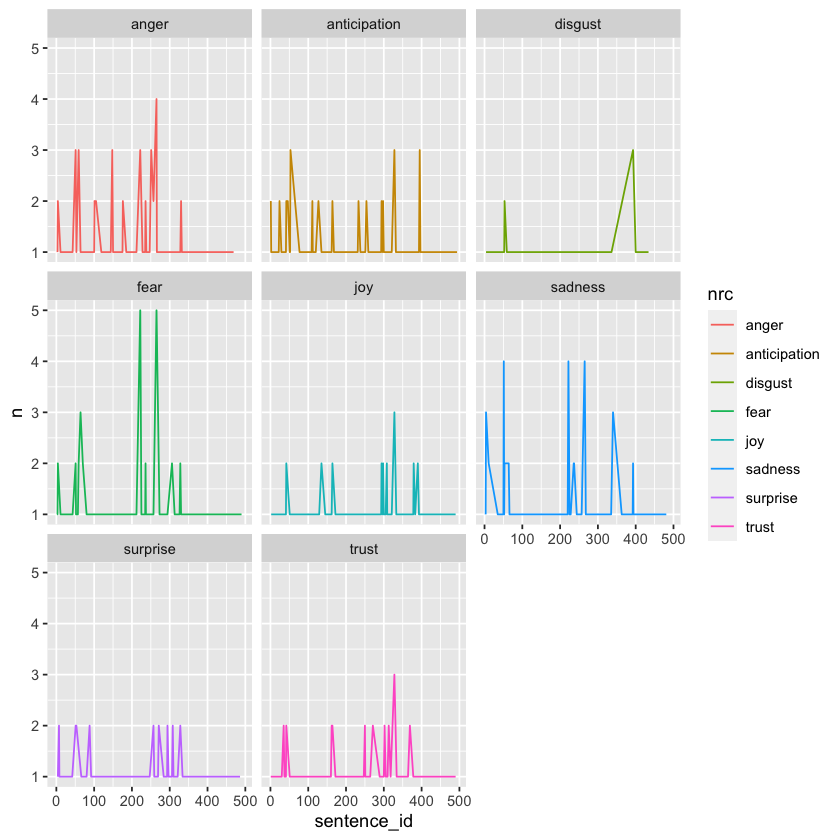

In [42]:
sentiment_tally %>%
    filter(! nrc %in% c('positive', 'negative')) %>%

ggplot() +
    aes(x=sentence_id, y=n, col=nrc) +
    geom_line() +
    facet_wrap(~nrc)

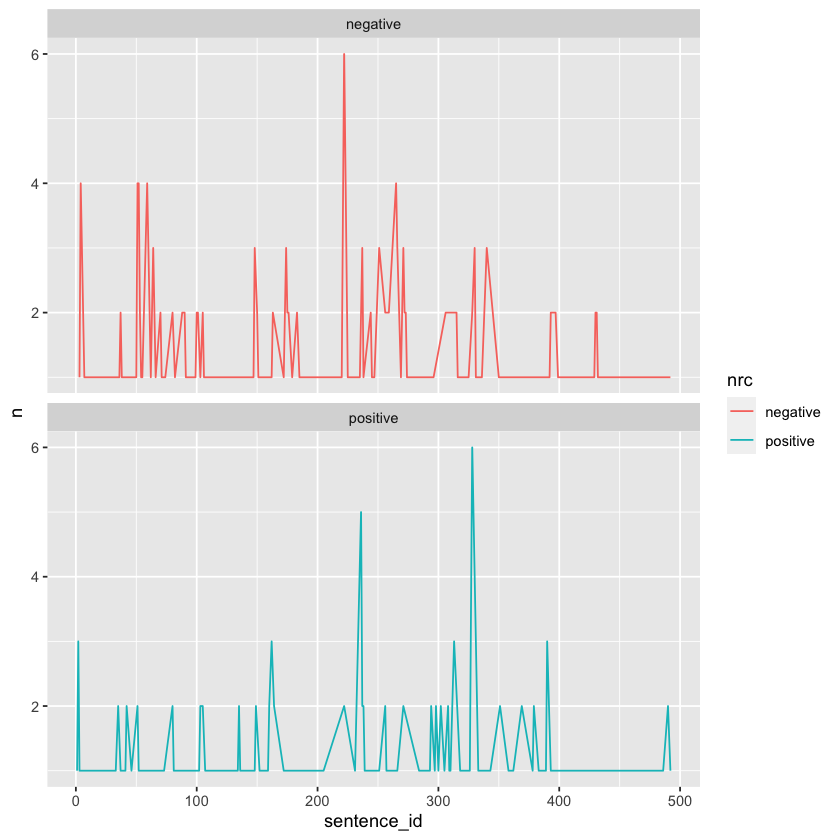

In [43]:
sentiment_tally %>%
    filter(nrc %in% c('positive', 'negative')) %>%

ggplot() +
    aes(x=sentence_id, y=n, col=nrc) +
    geom_line() +
    facet_wrap(~nrc, nrow=2)